# Pytorch基礎
Pytorchを使う上で一番ネックになるのはPytorchの文法、classの仕様などを詳しく知らないことです。
<br>
それを解説するipynbファイルを制作しました。<br>
基本コマンド編は適宜既知の内容を読み飛ばして使用ください<br>
目次
- 基本コマンド
- Dataloader定義
- モデル定義
- Pytorchの勾配について, 最適化の方法

### 基本コマンド編

In [1]:
#警告の非表示
import warnings
warnings.simplefilter("ignore")

Tensorの作り方<br>
Pythonデフォルトにもあるリストからtorch.tensorで作る方法とnumpyのndarrayを使ってtorch.tensorかfrom_numpyから作る方法の二通りがある<br>
引数にdtypeを加えることで型を変更することができる。<br>
基本的にPytorchで使う方はfloat32型である。tensor.float()とすることでfloat32型の変換を行うこともできる。<br>

In [2]:
import torch
import numpy as np
a = [1,2,3]
b = np.array([1,2,3])
print("Pythonのリストから制作",torch.tensor(a))
print("Pythonのnumpyからtorch.tensorで制作",torch.tensor(b))
print("Pythonのnumpyからtorch.from_numpyで制作",torch.from_numpy(b))
print("dtypeを引数にすることで型をfloatへ", torch.tensor(a, dtype = torch.float))

Pythonのリストから制作 tensor([1, 2, 3])
Pythonのnumpyからtorch.tensorで制作 tensor([1, 2, 3])
Pythonのnumpyからtorch.from_numpyで制作 tensor([1, 2, 3])
dtypeを引数にすることで型をfloatへ tensor([1., 2., 3.])


全成分が0と1のTensorの制作<br>
torch.zeros, torch.onesはtorch.zeros(d1,d2,...dn)のようにn次元目の要素数を指定して制作する

In [3]:
a = torch.zeros(3,3)
b = torch.ones(3,3)
print("torch.zerosで制作(3,3)Tensor\n", a.shape, "\n", a)
print("torch.onesで制作(3,3)Tensor\n", b.shape, "\n", b)

torch.zerosで制作(3,3)Tensor
 torch.Size([3, 3]) 
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.onesで制作(3,3)Tensor
 torch.Size([3, 3]) 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


乱数Tensorの作成<br>
0から1までの一様分布ならば<br>
torch.randはtorch.rand(d1,d2,...dn)のようにn次元目の要素数を指定して制作する

In [4]:
a = torch.rand(3,3)
print("torch.randで制作(3,3)Tensor\n", a.shape, "\n", a)
#他にも, torch.randnで正規分布の乱数の生成, torch.bernoulliでベルヌーイ分布の乱数の生成, torch.multinominalで多項分布の乱数の生成が行われる

torch.randで制作(3,3)Tensor
 torch.Size([3, 3]) 
 tensor([[0.1493, 0.4873, 0.4839],
        [0.0998, 0.0131, 0.1331],
        [0.0270, 0.1556, 0.7052]])


値を指定して行列を作るのはtorch.full関数を用いる<br>
torch.fullはtorch.full(size = (tuple or list), fill_value = (int, float))のように指定する

In [5]:
a = torch.full(size = (3,3), fill_value = 100)
print("torch.fullで制作\n", a)

torch.fullで制作
 tensor([[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]])


単位行列はtorch.eyeで制作する引数には次元数を指定する。

In [6]:
a = torch.eye(3)
print("torch.eyeで制作, 3d対角行列\n",a)

torch.eyeで制作, 3d対角行列
 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


等差数列のTensorを作成<br>
torch.arrange(start = Number, end = Number, step = Number)

In [7]:
print("開始: 0, 終了: 100, step: 2\n",torch.arange(start = 0, end = 100, step = 2))

開始: 0, 終了: 100, step: 2
 tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70,
        72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])


Tensorのデータ型と形状を操作する<br>
データ型を変更するのは制作したTensorにtoメソッドを使用します。<br>
形状指定は転置にはtransposeメソッド, 形状変更はreshapeかviewメソッド, <br>サイズが1の次元を追加するのはunsqueezeメソッドサイズが1の次元を削除はsqueezeメソッドを使う<br>
指定された順に次元を入れ替えるにはtorch.permuteメソッドを用いる<br>
各関数, メソッドの引数は<br>
tensor.transpose(転置する次元1つ目,転置する次元2つ目)<br>
tensor.reshape(d1,d2,d3,...dn)<br>
tensor.unsqueeze(追加するサイズ1の次元)<br>
tensor.squeeze(削除するサイズ1の次元)<br>
tensor.permute(d1, d2, ..., dn)<br>
のように用いる

In [8]:
a = torch.tensor([[[1],[2],[3]],[[4],[5],[6]]])
print("元のTensor\n", a, a.shape)
print("転置\n", a.transpose(0,1),a.transpose(0,1).shape)
print("形状変更 reshape\n", a.reshape(-1,1),a.reshape(-1,1).shape) 
#numpyを使い慣れている人ならわかるように、引数に-1を指定すると, 0以上で指定した次元のサイズをいい感じに整えてくれます、
print("形状変更 view\n", a.reshape(-1,1),a.view(-1,1).shape)
# a.viewでエラーが出ることがある場合は.contiguous()を呼んでからview()する(https://discuss.pytorch.org/t/runtimeerror-input-is-not-contiguous/930)
print("サイズが1の次元を追加\n", a.unsqueeze(2), a.unsqueeze(2).shape)
print("サイズが1の次元を削除\n", a.squeeze(2), a.squeeze(2).shape)
print("次元の入れ替え\n", a.permute(2,1,0), a.permute(2,1,0).shape) 
#指定するのは次元, 今回は元の行列の3次元目(2)を1次元目(0),2次元目(1)を2次元目(1), 1次元目(0)を3次元目(2)にしている。

元のTensor
 tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]]]) torch.Size([2, 3, 1])
転置
 tensor([[[1],
         [4]],

        [[2],
         [5]],

        [[3],
         [6]]]) torch.Size([3, 2, 1])
形状変更 reshape
 tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]]) torch.Size([6, 1])
形状変更 view
 tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]]) torch.Size([6, 1])
サイズが1の次元を追加
 tensor([[[[1]],

         [[2]],

         [[3]]],


        [[[4]],

         [[5]],

         [[6]]]]) torch.Size([2, 3, 1, 1])
サイズが1の次元を削除
 tensor([[1, 2, 3],
        [4, 5, 6]]) torch.Size([2, 3])
次元の入れ替え
 tensor([[[1, 4],
         [2, 5],
         [3, 6]]]) torch.Size([1, 3, 2])


squeezeとunsqueezeはよく使うため詳しく解説しておく。<br>
tensor.squeeze(num): num次元目のサイズが1ならばその次元を消す。サイズが1でなければ消さない<br>
tensor.unsqueeze(num): num次元目に次元を増やしてサイズを1とする。<br>
増やし方は、<br>
$(d_0, d_1, d_{num}, d_{num+1}, d_n) -> (d_0, d_1, d_{num},1, d_{num+1}, d_n)$<br>
と言った感じである。$num \gt n$のときはエラーとなる。<br>

In [9]:
a = torch.tensor([[[1],[2],[3]],[[4],[5],[6]]])
print("元のTensor: \n", a, a.shape)
print("tensor.squeeze(0): \n", a.squeeze(0), a.squeeze(0).shape)
print("tensor.squeeze(1): \n", a.squeeze(1), a.squeeze(1).shape)
print("tensor.squeeze(2): \n", a.squeeze(2), a.squeeze(2).shape)

元のTensor: 
 tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]]]) torch.Size([2, 3, 1])
tensor.squeeze(0): 
 tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]]]) torch.Size([2, 3, 1])
tensor.squeeze(1): 
 tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]]]) torch.Size([2, 3, 1])
tensor.squeeze(2): 
 tensor([[1, 2, 3],
        [4, 5, 6]]) torch.Size([2, 3])


In [10]:
print("元のTensor: \n", a, a.shape)
print("tensor.unsqueeze(0):\n", a.unsqueeze(0), a.unsqueeze(0).shape)
print("tensor.unsqueeze(1):\n", a.unsqueeze(1), a.unsqueeze(1).shape)
print("tensor.unsqueeze(2):\n", a.unsqueeze(2), a.unsqueeze(2).shape)
print("tensor.unsqueeze(3):\n", a.unsqueeze(3), a.unsqueeze(3).shape)

元のTensor: 
 tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]]]) torch.Size([2, 3, 1])
tensor.unsqueeze(0):
 tensor([[[[1],
          [2],
          [3]],

         [[4],
          [5],
          [6]]]]) torch.Size([1, 2, 3, 1])
tensor.unsqueeze(1):
 tensor([[[[1],
          [2],
          [3]]],


        [[[4],
          [5],
          [6]]]]) torch.Size([2, 1, 3, 1])
tensor.unsqueeze(2):
 tensor([[[[1]],

         [[2]],

         [[3]]],


        [[[4]],

         [[5]],

         [[6]]]]) torch.Size([2, 3, 1, 1])
tensor.unsqueeze(3):
 tensor([[[[1]],

         [[2]],

         [[3]]],


        [[[4]],

         [[5]],

         [[6]]]]) torch.Size([2, 3, 1, 1])


Tensorでの算術演算<br>
基本的にはnumpyと同じなので使い慣れている人には大丈夫なはずです。<br>
Broadcastなどの仕様を知らない場合は理解しておきましょう。<br>

In [11]:
#説明に使うTensorの定義
a = torch.tensor([[1.,2.,3.],[4.,5.,6.]]) #size (2,3)のTensor
b = torch.tensor([[1.,2.],[3.,4.],[5.,6.]]) #size (3,2)のTensor
c = 10. #スカラー
d = torch.tensor([1.,2.,3.]) #size (3)のTensor
e = torch.tensor([[7.,8.,9.],[1.,2.,3.]])

行列の要素積(アダマール積)<br>
行列の要素ごとの計算はtorch.multiply関数か、<br>Pythonの演算記号*を用いるものの2通りがあります。<br>どちらも同じ計算結果となります

In [12]:
print("torch.multiplyの計算結果\n", torch.multiply(a,e))
print("*での計算結果\n", a*e)

torch.multiplyの計算結果
 tensor([[ 7., 16., 27.],
        [ 4., 10., 18.]])
*での計算結果
 tensor([[ 7., 16., 27.],
        [ 4., 10., 18.]])


行列積<br>
線形代数でよく使われる行列の積です。<br>
torch.matmulもしくは@記号で計算ができます。<br>
torch.dotでの計算も可能です。

In [13]:
print("torch.multiplyの計算結果\n", torch.matmul(a,b))
print("@での計算結果\n", a@b)

torch.multiplyの計算結果
 tensor([[22., 28.],
        [49., 64.]])
@での計算結果
 tensor([[22., 28.],
        [49., 64.]])


三階以上のTensorの掛け算には<br>
torch.bmm(Tensor1, Tensor2)(batch matrix matrix product)や、torch.einsumを用いる方が良いです。<br>
torch.bmmは3階のテンソルで、それぞれが(b, n, m)と(b, m, p)のsizeを有する場合に(b, n, p)のテンソルを出力します。<br>

##### einsum, bmm共にattentionの実装において
##### pythonに組み込まれているfor文を使わずに効率よくバッチごとの計算を行うために必要な関数です。
##### 今はわからなくてもattention_from_scratch.ipynbでのattentionの実装では必ずマスターしましょう。

In [14]:
a = torch.ones(2, 3, 4)
b = torch.ones(2, 4, 5)
print("計算対象のTensor: ", a.shape, b.shape)
print("torch.bmm: \n", torch.bmm(a,b), torch.bmm(a,b).shape)

計算対象のTensor:  torch.Size([2, 3, 4]) torch.Size([2, 4, 5])
torch.bmm: 
 tensor([[[4., 4., 4., 4., 4.],
         [4., 4., 4., 4., 4.],
         [4., 4., 4., 4., 4.]],

        [[4., 4., 4., 4., 4.],
         [4., 4., 4., 4., 4.],
         [4., 4., 4., 4., 4.]]]) torch.Size([2, 3, 5])


torch.einsumはアインシュタインの縮約記法による計算です。<br>
einsumは、最初の引数に、計算を行う前と後のサイズを添字とした文字列で与え、第二、第三の引数にTensorを与えて計算します。<br>
詳しくは公式ドキュメント(https://pytorch.org/docs/stable/torch.html#torch.einsum)を参照してください。<br>
上のtorch.bmmでの計算は下のように実装できます<br>

In [15]:
a = torch.ones(2, 3, 4)
b = torch.ones(2, 4, 5)
print("計算対象のTensor: ", a.shape, b.shape)
print('torch.einsum("bnm, bmp->bnp", Tensor1, Tensor2): \n', torch.einsum("bnm, bmp->bnp",a,b), torch.einsum("bnm, bmp->bnp",a,b).shape)

計算対象のTensor:  torch.Size([2, 3, 4]) torch.Size([2, 4, 5])
torch.einsum("bnm, bmp->bnp", Tensor1, Tensor2): 
 tensor([[[4., 4., 4., 4., 4.],
         [4., 4., 4., 4., 4.],
         [4., 4., 4., 4., 4.]],

        [[4., 4., 4., 4., 4.],
         [4., 4., 4., 4., 4.],
         [4., 4., 4., 4., 4.]]]) torch.Size([2, 3, 5])


Tensorの足し算引き算
Tensorの足し算引き算が可能になる条件は何通りかあります。
- サイズが完全に揃っている場合
- ブロードキャストが使える状態の場合
- 計算対象の一方がスカラーの場合

In [16]:
#サイズが完全に揃っている場合
#説明に使うTensorの定義
a = torch.tensor([[1.,2.,3.],[4.,5.,6.]]) #size (2,3)のTensor
e = torch.tensor([[7.,8.,9.],[1.,2.,3.]])
print("サイズが完全に揃っている場合\n", a.shape, e.shape, "\n" ,a + e)

サイズが完全に揃っている場合
 torch.Size([2, 3]) torch.Size([2, 3]) 
 tensor([[ 8., 10., 12.],
        [ 5.,  7.,  9.]])


ブロードキャストが使える時の場合<br>
ブロードキャストに関してはNumpyの記事を参照して欲しいです。<br>少し細かい話にはなりますが、
計算対象のテンソルのサイズが合っていなくても、<br>一部のサイズが合っていれば計算ができるといった感じです。例えば<br>
Tensor1: size (3,3), Tensor2: size (1,3)という2つのテンソルでTensor1 + Tensor2を計算する時に<br>
Tensor2のサイズはTensor1に合わせて(3,3)というサイズにまで拡張されて計算されます。<br>
このときはTensor2 = [1,2,3]ならば、Tensor2は[1,2,3]という要素が3つになった(3,3)というサイズになって計算が行われます。<br>

In [17]:
print("Tensor1:",  a.shape)
print("Tensor2:",  d.shape)
print("Tensor1 + Tensor2 =\n", a + d)
#実は、ブロードキャストは他の演算でも有効
print("Tensor1 * Tensor2 =\n", a * d)

Tensor1: torch.Size([2, 3])
Tensor2: torch.Size([3])
Tensor1 + Tensor2 =
 tensor([[2., 4., 6.],
        [5., 7., 9.]])
Tensor1 * Tensor2 =
 tensor([[ 1.,  4.,  9.],
        [ 4., 10., 18.]])


スカラー演算<br>
スカラーでの演算は全ての要素が足し引き、掛け算割り算されます。<br>
スカラー演算はブロードキャストの一種と見なすこともできます

In [18]:
print("Tensor1:\n",  a)
print("Scalar",  c)
print("Scaler + Tensor1 = \n", a + c)

Tensor1:
 tensor([[1., 2., 3.],
        [4., 5., 6.]])
Scalar 10.0
Scaler + Tensor1 = 
 tensor([[11., 12., 13.],
        [14., 15., 16.]])


##### ブロードキャスト機能をうまく活用すると効率的にコードを書くことができます。<br>他人のコードはブロードキャスト機能を用いたものが多いため、注意を払って読みましょう。<br>また、この他にもnumpyにあったsum, mean, var, std, max, minなども実装されています。

$L_p$ノルムを求めることができます。$L_p$ノルムとは以下の式で定義される量です。<br>
ベクトルではなく2階以上のテンソルの場合は2階以上のテンソルの場合の$L_p$ノルムを計算します。<br>
$$
    ||x||_p = \left(x^p_1 + x^p_2 + \ldots + x^p_N\right)^{1/p}
$$
$L_p$ノルムを求める関数にはtorch.linalg.norm関数とtorch.norm関数があります。<br>
それぞれ仕様に違いがあるので注意<br>

torch.linalg.norm関数: ordという引数で計算するノルムの種類を指定<br>
torch.norm関数: pという引数で計算するノルムの種類を指定<br>
- 引数にpとdimがあるpは$L_p$ノルムのpの値を決める。dimは計算する次元を決定する。<br>
- 計算する次元を決定する引数名はnumpyではaxisだったが、PyTorchではdimであることに注意する必要がある。

In [19]:
print("計算対象行列\n", a)
print("行列L_2ノルム(torch.norm)", a.norm(p = 2))
print("行列L_2ノルム(torch.norm), dim = 1", a.norm(p = 2,dim = 1))

計算対象行列
 tensor([[1., 2., 3.],
        [4., 5., 6.]])
行列L_2ノルム(torch.norm) tensor(9.5394)
行列L_2ノルム(torch.norm), dim = 1 tensor([3.7417, 8.7750])


Tensorの分割、連結<br>
Tensorの分割はtorch.chunk, torch.splitなどの関数が用意されており、<br>
Tensorの結合はtorch.stack, torch.catなどの関数が用意されている。<br>
torch.chunkはchunks引数とdim引数を持ち、chunksで分割する数を指定し、dimで分割する次元を指定する。<br>

In [20]:
a = torch.arange(10).reshape(2, 5)
print("元のTensor: \n", a)
print("torch.chunk(Tensor, chunks = 2): ", a.chunk(2))
print("torch.chunk(Tensor, chunks = 2, dim = 1): \n")
for t in a.chunk(chunks = 2, dim = 1):
    print(t)

元のTensor: 
 tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
torch.chunk(Tensor, chunks = 2):  (tensor([[0, 1, 2, 3, 4]]), tensor([[5, 6, 7, 8, 9]]))
torch.chunk(Tensor, chunks = 2, dim = 1): 

tensor([[0, 1, 2],
        [5, 6, 7]])
tensor([[3, 4],
        [8, 9]])


torch.splitはsplit_size_or_sections引数とdim引数を持ち<br>
dimはtorch.chunkと同様の働きをする。<br>
split_size_or_sectionsにint型を渡すと、渡した数を要素に持つようにデータを分割する<br>
split_size_or_sectionsにlist型を渡すとlistの要素に従ってデータを分割する。例えば[1,3,1]とすると、<br>
要素数が[1,3,1]となるように分割する<br>

In [21]:
a = torch.arange(10).reshape(2, 5)
print("元のTensor: \n", a)
print("torch.split(Tensor, split_size_or_sections=2,dim = 1): \n")
for t in torch.split(a,split_size_or_sections=2,dim = 1):
    print(t)
print("torch.split(Tensor, split_size_or_sections=[1,3,1],dim = 1): \n")
for t in torch.split(a,split_size_or_sections=[1,3,1],dim = 1):
    print(t)

元のTensor: 
 tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
torch.split(Tensor, split_size_or_sections=2,dim = 1): 

tensor([[0, 1],
        [5, 6]])
tensor([[2, 3],
        [7, 8]])
tensor([[4],
        [9]])
torch.split(Tensor, split_size_or_sections=[1,3,1],dim = 1): 

tensor([[0],
        [5]])
tensor([[1, 2, 3],
        [6, 7, 8]])
tensor([[4],
        [9]])


Tensorの連結に使う関数にはtorch.catとtorch.stackがあります。<br>
torch.catは結合する2つのTensorの既存の次元数に従ってTensorを結合する関数であり,<br>
torch.stackは結合する2つのTensorに次元を追加してTensorを結合する関数である。<br>
torch.catはtorch.cat([結合するTensorのリスト], dim = (結合する次元を指定))という感じで使い、<br>
torch.stackはtorch.stack([結合するTensorのリスト], dim = (増やして結合する次元を指定))という感じで使う。<br>

In [22]:
a = torch.arange(6).reshape(2, 3)
b = torch.arange(8).reshape(2, 4)
print("結合するTensorのサイズ", a.shape, b.shape)
print("結合するTensor\n", a,"\n", b)
print("torch.cat([Tensor1, Tensor2], dim = 1): \n", torch.cat([a,b], dim = 1))

結合するTensorのサイズ torch.Size([2, 3]) torch.Size([2, 4])
結合するTensor
 tensor([[0, 1, 2],
        [3, 4, 5]]) 
 tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])
torch.cat([Tensor1, Tensor2], dim = 1): 
 tensor([[0, 1, 2, 0, 1, 2, 3],
        [3, 4, 5, 4, 5, 6, 7]])


In [23]:
a = torch.arange(6).reshape(2, 3)
b = torch.arange(6).reshape(2, 3)
print("結合するTensorのサイズ", a.shape, b.shape)
print("結合するTensor\n", a,"\n", b)
print("torch.stack([Tensor1, Tensor2], dim = 2): \n", torch.stack([a,b], dim = 2),torch.stack([a,b], dim = 2).shape)

結合するTensorのサイズ torch.Size([2, 3]) torch.Size([2, 3])
結合するTensor
 tensor([[0, 1, 2],
        [3, 4, 5]]) 
 tensor([[0, 1, 2],
        [3, 4, 5]])
torch.stack([Tensor1, Tensor2], dim = 2): 
 tensor([[[0, 0],
         [1, 1],
         [2, 2]],

        [[3, 3],
         [4, 4],
         [5, 5]]]) torch.Size([2, 3, 2])


einopsというライブラリを用いるとアインシュタインの縮約記法を用いて配列を次元毎に操作することが簡単となります。<br>
einsumとeinopsを使用してコードを簡潔に書いてしまうのがどうやら流行っているようなので覚えて損はないはずです。[einsum-attention](https://theaisummer.com/einsum-attention/)

einopsはPytorchとの互換性があるため、普通に用いても勾配の計算方法を示してくれます。<br>Pytorchの勾配に関してはPytorchの勾配について, 最適化の方法で解説します。

einops.rearangeはTensorの分割を行います。()で囲んだところは一つの次元とみなします。例えば下の実行例では<br>
(i j (h k))という3つの次元のうち、3つめをh×kとみなし、h = 5, k = 3として分割をしています。<br>

In [24]:
import torch
import numpy as np
from einops import rearrange, reduce
x = torch.tensor(np.random.uniform(low = -1, high = 1, size = (2,3,15)), requires_grad=True).float()
print("元のTensor:\n",x,x.shape)
print("rearrange(i j (h k)->h i j k):\n",rearrange(x,"i j (h k) -> h i j k",h=5,k=3),rearrange(x,"i j (h k) -> h i j k",h=5,k=3).shape)

元のTensor:
 tensor([[[ 0.3190,  0.3849,  0.0924, -0.0886,  0.3225,  0.1488,  0.6149,
          -0.6632, -0.2944,  0.3243, -0.3702, -0.1325, -0.8012, -0.5966,
          -0.4884],
         [-0.9475,  0.0532, -0.7294,  0.5840,  0.9410,  0.5510, -0.4713,
          -0.1896,  0.2714, -0.7667,  0.7492, -0.8148,  0.2695, -0.7870,
          -0.5291],
         [ 0.4864, -0.9792,  0.2007, -0.4630,  0.7768, -0.6595,  0.2567,
           0.5525, -0.0207, -0.8245,  0.6366,  0.2192,  0.3277, -0.8060,
          -0.9147]],

        [[-0.5084,  0.3811,  0.6384, -0.5537, -0.1752,  0.8650, -0.2048,
          -0.9870, -0.0086,  0.3217, -0.0982, -0.2040, -0.2163, -0.7580,
           0.3338],
         [-0.0377, -0.8841, -0.9739,  0.1904,  0.1510, -0.6864, -0.0790,
          -0.5698,  0.3305,  0.1943,  0.3973,  0.5618, -0.9110, -0.8872,
          -0.7736],
         [ 0.0921,  0.2255,  0.4380,  0.8268, -0.6630,  0.0804,  0.4171,
          -0.2415, -0.9891, -0.0653,  0.7564, -0.2714, -0.8692,  0.0771,
           

einops.reduceは次元を減らします。第一引数に次元を減らす対象となるテンソル, 第二引数に減らす前の次元と減らした後の次元を指定、第三引数に次元の減らし方を指定します。<br>

In [25]:
print("元のTensor:\n",x,x.shape)
print("reduce(i j k->i j) method max:\n",reduce(x, "i j k->i j","max"),reduce(x, "i j k->i j","max").shape)

元のTensor:
 tensor([[[ 0.3190,  0.3849,  0.0924, -0.0886,  0.3225,  0.1488,  0.6149,
          -0.6632, -0.2944,  0.3243, -0.3702, -0.1325, -0.8012, -0.5966,
          -0.4884],
         [-0.9475,  0.0532, -0.7294,  0.5840,  0.9410,  0.5510, -0.4713,
          -0.1896,  0.2714, -0.7667,  0.7492, -0.8148,  0.2695, -0.7870,
          -0.5291],
         [ 0.4864, -0.9792,  0.2007, -0.4630,  0.7768, -0.6595,  0.2567,
           0.5525, -0.0207, -0.8245,  0.6366,  0.2192,  0.3277, -0.8060,
          -0.9147]],

        [[-0.5084,  0.3811,  0.6384, -0.5537, -0.1752,  0.8650, -0.2048,
          -0.9870, -0.0086,  0.3217, -0.0982, -0.2040, -0.2163, -0.7580,
           0.3338],
         [-0.0377, -0.8841, -0.9739,  0.1904,  0.1510, -0.6864, -0.0790,
          -0.5698,  0.3305,  0.1943,  0.3973,  0.5618, -0.9110, -0.8872,
          -0.7736],
         [ 0.0921,  0.2255,  0.4380,  0.8268, -0.6630,  0.0804,  0.4171,
          -0.2415, -0.9891, -0.0653,  0.7564, -0.2714, -0.8692,  0.0771,
           

条件演算子

torch.where条件を満たす要素に処理を行う関数です。
torch.where(条件式, Trueの場合, Falseの場合)のように書きます。

In [26]:
a = torch.randn(10)
a = 1/(1+torch.exp(a))
print("元のTensor: \n", a)
print("Tensor1 > 0.5なら1, Tensor1 <= 0.5なら0としてtorch.where関数を適用させたもの: \n", torch.where(a > 0.5, torch.ones_like(a), torch.zeros_like(a)))

元のTensor: 
 tensor([0.3092, 0.6917, 0.9336, 0.4014, 0.4436, 0.4361, 0.6281, 0.3551, 0.6891,
        0.1616])
Tensor1 > 0.5なら1, Tensor1 <= 0.5なら0としてtorch.where関数を適用させたもの: 
 tensor([0., 1., 1., 0., 0., 0., 1., 0., 1., 0.])


torch.clamp<br>
torch.clampは値を一定の範囲でクリッピングします。logやゼロ割に対処するために使用します。<br>
torch.clamp(処理前のTensor, min, max)のように指定します。

In [27]:
a = torch.randn(10)
a_clamp = torch.clamp(a, 1e-32, 1e+32) #値が
print("元のTensor: \n", a)
print("torch.clampを適用しない場合: \n", torch.log(a))
print("torch.clampを適用する場合: \n", torch.log(a_clamp))

元のTensor: 
 tensor([-0.2070,  0.4184, -0.6245, -0.3027, -1.8518,  0.1531, -0.7373,  0.7766,
         0.1881,  0.7315])
torch.clampを適用しない場合: 
 tensor([    nan, -0.8713,     nan,     nan,     nan, -1.8768,     nan, -0.2528,
        -1.6710, -0.3127])
torch.clampを適用する場合: 
 tensor([-73.6827,  -0.8713, -73.6827, -73.6827, -73.6827,  -1.8768, -73.6827,
         -0.2528,  -1.6710,  -0.3127])


torch.ge, torch.gt, torch.le, torch.lt, torch.eq<br>
torch.geはgreater than or equal toを意味し,torch.ge(tensor, num)となった場合、tensor>=numとなった要素をTrueとして返します。<br>
torch.gt, torch.le, torch.lt, torch.eqも関数の呼び出し方は一緒です。<br>
gtはgreater than, leはless than or equal, ltはless than, eqはequalを意味します。

In [28]:
a = torch.arange(10)
print("元のTensor: \n", a)
print("Tensor >= 4", torch.ge(a, 4))
print("Tensor > 4", torch.gt(a, 4))
print("Tensor <= 4", torch.le(a, 4))
print("Tensor < 4", torch.lt(a, 4))
print("Tensor == 4", torch.eq(a, 4))

元のTensor: 
 tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Tensor >= 4 tensor([False, False, False, False,  True,  True,  True,  True,  True,  True])
Tensor > 4 tensor([False, False, False, False, False,  True,  True,  True,  True,  True])
Tensor <= 4 tensor([ True,  True,  True,  True,  True, False, False, False, False, False])
Tensor < 4 tensor([ True,  True,  True,  True, False, False, False, False, False, False])
Tensor == 4 tensor([False, False, False, False,  True, False, False, False, False, False])


numpyと同じく、算術演算子を使うこともできます。実用上はこちらの方が使う場面が多いかもしれません

In [29]:
a = torch.arange(10)
print("元のTensor: \n", a)
print("Tensor >= 4", a>=4)
print("Tensor > 4", a>4)
print("Tensor <= 4", a<=4)
print("Tensor < 4", a<4)
print("Tensor == 4", a==4)

元のTensor: 
 tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Tensor >= 4 tensor([False, False, False, False,  True,  True,  True,  True,  True,  True])
Tensor > 4 tensor([False, False, False, False, False,  True,  True,  True,  True,  True])
Tensor <= 4 tensor([ True,  True,  True,  True,  True, False, False, False, False, False])
Tensor < 4 tensor([ True,  True,  True,  True, False, False, False, False, False, False])
Tensor == 4 tensor([False, False, False, False,  True, False, False, False, False, False])


他にPytorchで知っておくメソッドは, <br>リストやnumpyのndarrayに変換するtolist, numpyメソッド, 値の取得を行うitemメソッド, 計算するデバイスの指定などがあります。<br>
紹介する時になったら紹介します。

### Dataloader定義編

有名なデータセットは前もってPytorch上で扱いやすいように提供されています。<br>しかし実際には自分でデータを集めて制作した自作データセットを使いたいという場面もあります。<br>
そこでこの章では自作Dataloaderセットの定義の方法を説明します。

データがTensorオブジェクト, Pythonリスト, またはNumpy配列として既に存在している場合には<br>torch.utils.data.DataLoaderクラスを用いればデータセットローダーを簡単に制作することができる。<br>
DataLoaderクラスの定義の際にBatch_sizeを指定すると, 指定したサイズのバッチが反復の際に出力される。<br>
また、シャッフルが必要なときはshuffle = Trueと引数を変更することでデータがシャッフルされた状態で取り出される。

In [30]:
from torch.utils.data import DataLoader
t = torch.ones(size = (10,3), dtype = torch.float32)
data_loader = DataLoader(t, batch_size = 2)
for t_item in data_loader:
    print(t_item)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


次に2つのテンソルを1つのデータセットに結合する。<br>
この時に自作データセットの定義が必要となる。<br>
Pythonのクラスに関しての説明は詳しくは行わないので, Pythonの基本的な参考書で補填して欲しい。<br>
Datasetクラスの継承を行ったあと, init, getitem, lenメソッドの挙動の定義を行うことで簡単にDatasetクラスを制作することができる。<br>
getitemメソッドが見慣れないと思うので少し簡単な解説を行う。<br>
getitemメソッドはPythonの特殊メソッドであり鉤括弧[]でオブジェクトにアクセスした時の挙動を定義するものである。<br>
例えばリストL = [0,1,2,3,4,5]の4番目の要素にアクセスする時、L[3] = 3となるのはこのgetitemメソッドによるものである。<br>
今回はfor文を回した時に, データとラベルを出力できるように制作する

In [31]:
#簡単なデータを制作する
data = torch.rand(size = (4,5), dtype = torch.float32)
y = torch.arange(4, dtype = torch.float32)
print("Data: \n", data, "\nlabel: \n", y)

Data: 
 tensor([[0.7725, 0.1325, 0.1150, 0.8772, 0.6803],
        [0.6020, 0.6206, 0.1650, 0.4728, 0.9869],
        [0.8132, 0.7102, 0.5097, 0.7580, 0.7245],
        [0.1720, 0.1463, 0.7559, 0.3371, 0.5650]]) 
label: 
 tensor([0., 1., 2., 3.])


In [32]:
from torch.utils.data import Dataset
class normal_dataset(Dataset):
    def __init__(self, data, y):
        self.data = data
        self.y = y
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return self.data[idx], self.y[idx]
d_set = normal_dataset(data, y)
for batch_x, batch_y in d_set:
    print(batch_x, batch_y)
print("Length: ", len(d_set))
#実際にDataLoaderと同じように使えることがわかった。

tensor([0.7725, 0.1325, 0.1150, 0.8772, 0.6803]) tensor(0.)
tensor([0.6020, 0.6206, 0.1650, 0.4728, 0.9869]) tensor(1.)
tensor([0.8132, 0.7102, 0.5097, 0.7580, 0.7245]) tensor(2.)
tensor([0.1720, 0.1463, 0.7559, 0.3371, 0.5650]) tensor(3.)
Length:  4


データセットがテンソル形式のラベルデータセットならば, 単純にtorch.utils.data.TensorDatasetを用いることでも実装ができる。<br>
TensorDatasetで制作したオブジェクトをDataLoaderに渡すことでbatch_sizeを指定してデータを取り出すこともできる。<br>

In [33]:
from torch.utils.data import TensorDataset
d_set = TensorDataset(data, y)
d_set = DataLoader(d_set, batch_size = 2)
for batch_x, batch_y in d_set:
    print(batch_x, batch_y)
print("Length: ", len(d_set))
#実際にDataLoaderと同じように使えることがわかった。

tensor([[0.7725, 0.1325, 0.1150, 0.8772, 0.6803],
        [0.6020, 0.6206, 0.1650, 0.4728, 0.9869]]) tensor([0., 1.])
tensor([[0.8132, 0.7102, 0.5097, 0.7580, 0.7245],
        [0.1720, 0.1463, 0.7559, 0.3371, 0.5650]]) tensor([2., 3.])
Length:  2


データのサブセット作成<br>
torch.utils.data.Subset(data, idx)でデータセットのサブセットの制作が行える。

In [34]:
from torch.utils.data import Subset
d_set = TensorDataset(data, y)
d_set_sub = Subset(d_set, torch.arange(1))
d_set_sub = DataLoader(d_set_sub)
for batch_x, batch_y in d_set_sub:
    print(batch_x, batch_y)
print("Length: ", len(d_set_sub))

tensor([[0.7725, 0.1325, 0.1150, 0.8772, 0.6803]]) tensor([0.])
Length:  1


ここまでの説明はDataloaderの一部にすぎませんが, <br>Datasetクラスを定義し, init, len, getitemメソッドの挙動を定義することを覚えておけば, 応用が効くようになると思います。

### モデル定義編

この章では主にモデルを構築する方法を学びます。<br>Pytorchの高レベルAPIを用いれば簡単なモデルの構築は3秒で終わりますが, <br>
今回は全結合層, 2次元畳み込み層の低レベルAPIを用いた実装を通してより深くPytorchを学んだ上でモデルの定義を行おうと思います。<br>
<br>
低レベルAPIで高レベルAPIにある機能を実装することは、Pytorch内部の仕様の理解を助け、よりカスタムされた機能を追加することに役立つため、<br>
必ず自分でドキュメントを読み、一度は手を動かして行ってください。<br>
写経でも全く問題はありません、しかし組んでいる最中でコードに疑問を持ったところは必ず理解して次に進みましょう。<br>
モデル定義編で扱わなかったレイヤーの低レベルAPI実装はAppendixに記しておきます。<br>

#### ReLU
ReLUは<br>$$\text{ReLU}(x) = \text{max}(0, x)$$<br>で定義される関数であり、$x=0$付近で非線形の特性を示す関数です。活性化関数としておそらく最も頻繁に使われています。<br>
Pytorchの練習としてtorch.where関数で組んでみましょう。
また、今後は関数を組む際に事故を防ぐためにPythonの型を明示的にコードを書いていきます。

In [35]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.where(x > 0, x, torch.zeros_like(x))
a = torch.randn(8)
print("元のTensor: ", a)
print("ReLU(Tensor): ", relu(a))

元のTensor:  tensor([-0.4885, -2.1808, -1.4371,  1.5590,  1.3819, -0.9579,  0.3448,  0.1898])
ReLU(Tensor):  tensor([0.0000, 0.0000, 0.0000, 1.5590, 1.3819, 0.0000, 0.3448, 0.1898])


全結合層のスクラッチ実装<br>
全結合層
$$
Z = XW^{T}+b
$$
の実装を行います。ここで、$W \in{M_{out\_dim×in\_dim}}, X \in{M_{num\_data×in\_dim}}$であることに注意してください。<br>
初めはこの定義に対して疑問を思うかもしれませんが、一度誤差逆伝播法の証明をすればわかるようになるかと思います。<br>
<br>実際に使う時はtorch.nn.Linearクラスを用いれば問題はありませんが, 今回はPytorchの理解のためにスクラッチ実装を行います。
手順<br>
- nn.Moduleの継承
- init引数をin_dim, out_dimとする。
- nn.Parameterでパラメーター行列, バイアスベクトルを制作
- クラス内でforward関数の挙動を定義, $Z = XW^{T}+b$を出力するようにする。これにはtorch.matmulとtorch.nn.functional.linearを使う方法の2通りがある

torch.nn.functional.linearはtorch.nn.functional.linear(A,B,b)として実行すると$AB^{T}+b$を出力する関数である。torch.matmulとの違いに気をつけよう。<br>
torch.matmulを使った方が直感的にはわかりやすい。
<br>
<br>
次に, nn.Parameterを使う理由としては、公式ドキュメントによると, nn.Parameterで定義されたパラメーターは<br>nn.Moduleのparameters()イテレーターとして追加されるからである。
<br>
<br>
nn.Moduleを継承したクラスでforwardを定義すると、丸括弧で囲んだときの挙動を指定する。例えば、Linear(x)などである。<br>
Pythonではこれは__call__メソッドの定義にあたるものだが、__call__メソッドとして forward が機能するようにモジュール側で実装されています。<br>

In [36]:
import torch.nn.functional as F
from torch import nn
rng = np.random.RandomState(1)
class linear(nn.Module):
    def __init__(self, in_dim: int or float, out_dim: int or float) -> None:
        super().__init__()
        #He uniformで初期化
        weight = torch.tensor(rng.uniform(low=-np.sqrt(6/in_dim),high=np.sqrt(6/in_dim),size=(out_dim, in_dim)).astype('float32'))
        #Biasは全て0で初期化
        bias = torch.tensor(np.zeros([out_dim]).astype('float32'))
        self.weight = nn.Parameter(weight)
        self.bias = nn.Parameter(bias)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        #以下の関数はreturn torch.matmul(x, self.weight.T) + self.biasを実行していることと同じである。
        return F.linear(x, self.weight, self.bias)

実際に使ってみよう。

In [37]:
x = torch.randn(size = (3,3))
L = linear(3,3)

次に,forwardが機能していることと, Linearのパラメーターがparametersメソッドを使った時にイテレーターになっているかを確認する。

In [38]:
print("forward: \n", L(x))
print("Linear parameters: ")
for p in L.parameters():
    print(p)

forward: 
 tensor([[ 0.9241,  0.6332,  0.5992],
        [-0.1345,  0.8631,  0.4104],
        [ 0.1910, -0.2729, -0.1300]], grad_fn=<AddmmBackward0>)
Linear parameters: 
Parameter containing:
tensor([[-0.2347,  0.6232, -1.4139],
        [-0.5591, -0.9991, -1.1530],
        [-0.8874, -0.4368, -0.2920]], requires_grad=True)
Parameter containing:
tensor([0., 0., 0.], requires_grad=True)


次に2次元畳み込み層の実装を示します。<br>
畳み込みをするモチベーションに関しては市販の技術書やウェブサイトを参考にしてほしい<br>
<br>
公式ドキュメントにのっとり、__init__にはin_channels, out_channels, kernel_size, stride, padding,dilation,groupを引数として実装します。<br>
バッチサイズを$N$, 入力チャンネルを$C_{in}$, 出力チャンネルを$C_{out}$, 入力2次元画像の高さを幅を$H, W$とすると<br>
conv2dは$(N, C_{in}, H, W) \to (N, C_{out}, H_{out}, W_{out})$とする層である。<br>
$H_{out}, W_{out}$の大きさはpaddingなどで決まる。<br>
式は以下の通りである。<br>
$$
H_{out} = \lfloor \dfrac{H_{in}+2\rm{padding}[0]-\rm{dilation}[0](\rm{kernel\_size}[0]-1)-1}{\rm{stride}[0]}+1 \rfloor
$$
$$
W_{out} = \lfloor \dfrac{W_{in}+2\rm{padding}[1]-\rm{dilation}[1](\rm{kernel\_size}[1]-1)-1}{\rm{stride}[1]}+1 \rfloor
$$
モデルを構築するときは畳み込み層を通した後の形に注意しながら実装する必要がある。<br>
二次元畳み込みは全結合層のようにtorch.matmulなどの単純な関数による実装はできないため、torch.nn.functional.conv2d関数を用いる<br>
もし本当にゼロからの実装に興味がある人は, 効率よく二次元畳み込み演算を計算する方法として<br>Winograd's Minimal Filteringアルゴリズムなどが知られているため、調べてもらいたい。<br>
単純に二次元畳み込みの定義式
$$
Y[i,j] = \sum\limits_{k_1=-\infty}^{+\infty}\sum\limits_{k_2=-\infty}^{+\infty}X[i-k_1, j-k_2]W[k_1,k_2]
$$
を実装するだけでは非常に効率が悪いため効率が良いアルゴリズムを用いてPytorchでは実装を行っている。

<br>

In [39]:
import torch.nn.functional as F
from torch import nn
rng = np.random.RandomState(1)
class conv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride = (1,1), padding = (0,0), dilation = (1,1), group = 1):
        super().__init__()
        filter_shape = (out_channels, in_channels // group, kernel_size[0], kernel_size[1])
        k = in_channels * kernel_size[0] * kernel_size[1]
        weight = torch.tensor(rng.uniform(low=-np.sqrt(k),high=np.sqrt(k),size=filter_shape).astype('float32'))
        bias = torch.tensor(rng.uniform(low = -np.sqrt(k), high = np.sqrt(k), size = [out_channels]).astype('float32'))
        self.weight = nn.Parameter(weight)
        self.bias = nn.Parameter(bias)
        self.stride = stride  
        self.padding = padding
        self.dilation = dilation
        self.group = group
    def forward(self, x):
        return F.conv2d(x, weight = self.weight, bias = self.bias, stride = self.stride, padding = self.padding, dilation = self.dilation, groups = self.group)

In [40]:
x = torch.tensor(rng.uniform(size = (3,3,3,3)).astype("float32"))
conv = conv2d(3,32,(3,3),padding=(1,1))

In [41]:
print("conv(x), conv(x)のサイズ: \n", conv(x), conv(x).shape)

conv(x), conv(x)のサイズ: 
 tensor([[[[-4.2212e+00,  1.2553e+01,  1.8412e+00],
          [ 1.9680e+00,  9.3378e+00,  1.0218e+01],
          [ 3.4083e+00,  9.3369e+00,  3.0335e+00]],

         [[-4.0024e+00, -1.6263e+00, -1.5996e+01],
          [-1.9691e+00, -6.2055e+00,  1.4242e+00],
          [-5.3402e-01, -6.7465e+00, -1.1870e+00]],

         [[-5.1369e+00,  5.8946e+00, -4.3092e+00],
          [-7.9002e+00, -7.5852e+00, -9.3150e+00],
          [-3.0901e+00, -1.0952e+01, -9.2359e+00]],

         [[-5.2849e+00, -1.3041e+01, -1.1580e+01],
          [-9.4775e+00, -6.8972e+00, -1.2919e+01],
          [-5.3173e+00, -6.5992e+00, -7.8031e+00]],

         [[ 1.4641e+00, -1.6522e+00,  2.8938e+00],
          [ 3.0718e+00,  3.8519e+00,  8.9192e+00],
          [ 1.4945e+01,  1.8072e+01,  7.8460e+00]],

         [[ 2.3566e+00,  2.1134e+00,  1.6296e+00],
          [ 9.4615e+00,  9.0693e+00,  1.0424e+00],
          [ 7.3955e+00, -1.5721e+00,  4.7677e+00]],

         [[ 3.8665e+00,  3.6910e+00, -3.2254e+

### Pytorchの勾配について, 最適化の方法編

PytorchのTensorには.data, .grad, .grad_fnという属性があります。<br>
dataはテンソルそのものです。<br>gradは損失関数により計算される最適化のためにパラメーターを動かす方向を表します。backwardメソッドにより加算されます。<br>
grad_fnはどのTensorを使ってどう作られたかを表すものです。自動微分の計算グラフ構築などに用いられます。

In [42]:
a = torch.Tensor([1.,2.,3.]).to(torch.float32)
a.requires_grad = True #勾配をTrueに
print("Tensor.data: ", a.data)
print("Tensor.grad: ",a.grad)
print("Tensor.grad_fn: ",a.grad_fn)

Tensor.data:  tensor([1., 2., 3.])
Tensor.grad:  None
Tensor.grad_fn:  None


まだ計算がなされていないので、Tensorのgradには勾配が計算されていない, ここで新たなTensorを制作し, <br>$(\rm{Tensor1} - \rm{Tensor2})^{2}$の平均を計算して勾配を計算してみる。

In [43]:
b = torch.Tensor([4.,5.,6.]).to(torch.float32)
b.requires_grad = True #勾配をTrueに
loss = torch.pow(a-b, 2).mean()
print("loss = torch.pow(Tensor1-Tensor2, 2): ", loss)
loss.backward()
print("Tensor1.grad: \n", a.grad)
print("Tensor2.grad: \n", b.grad)

loss = torch.pow(Tensor1-Tensor2, 2):  tensor(9., grad_fn=<MeanBackward0>)
Tensor1.grad: 
 tensor([-2., -2., -2.])
Tensor2.grad: 
 tensor([2., 2., 2.])


計算グラフはtorchvizのmake_dot関数で表示ができます。正しくモデルが制作できるか気になったら確認しましょう。

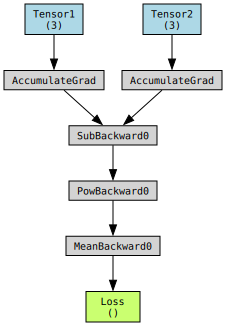

In [44]:
from torchviz import make_dot
graph = make_dot(loss,params = {"Tensor1": a,"Tensor2": b, "Loss": loss})
graph

勾配計算を適用しているTensorの勾配計算を一時的に停止するには.detachメソッドを用いる。

In [45]:
print("Tensor1.detach(): ", a.detach())

Tensor1.detach():  tensor([1., 2., 3.])


with torch.no_grad():と書くことで, withブロックが適用される範囲では勾配計算が停止されます。

In [46]:
add1 = a + b
with torch.no_grad():
    add2 = a + b
print("gradが適用されている場合のTensor1 + Tensor2: ", add1)
print("gradが適用されていない場合のTensor1 + Tensor2: ", add2)

gradが適用されている場合のTensor1 + Tensor2:  tensor([5., 7., 9.], grad_fn=<AddBackward0>)
gradが適用されていない場合のTensor1 + Tensor2:  tensor([5., 7., 9.])


では実際にモデルを定義して学習するところまでをやってみましょう。<br>今回はモデル定義編で制作したlinearクラスを使って学習していきましょう。<br>
データはmake_moonsを用います。

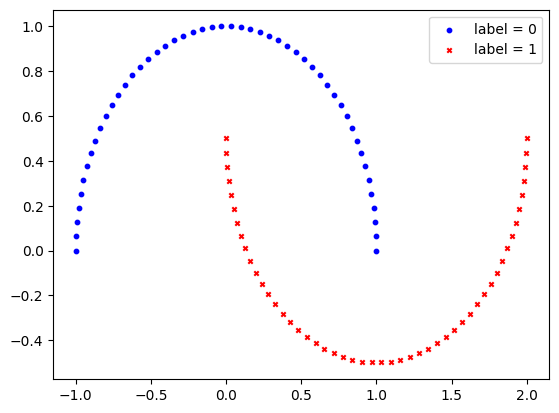

In [47]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
data, label = make_moons(100)
plt.scatter(data[label == 0][:,0],data[label == 0][:,1], s = 10, color = "blue")
plt.scatter(data[label == 1][:,0],data[label == 1][:,1], s = 10, color = "red", marker = "x")
plt.legend(["label = 0", "label = 1"])
plt.show()

In [48]:
#データとラベルのTensor化
from torch import optim
data = torch.Tensor(data)
label = torch.Tensor(label).view(-1,1)
data = (data - data.mean(axis = 0))/data.std(axis = 0) #平均で引いて標準偏差で割っておく。これで精度改善につながる。
#モデル定義
class Net(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__()
        self.l1 = linear(in_dim, hidden_dim)
        self.relu = relu
        self.l2 = linear(hidden_dim, out_dim)
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        return 1/(1+torch.exp(-x))

In [49]:
#上位APIを使う場合のコードは以下の通りとなります。
#class Net(nn.Module):
#    def __init__(self, in_dim, hidden_dim, out_dim):
#        super().__init__()
#        self.l1 = nn.Linear(in_dim, hidden_dim)
#        nn.init.uniform_(self.l1.weight, a = -np.sqrt(6/in_dim), b = np.sqrt(6/in_dim))
#        self.relu = nn.ReLU()
#        self.l2 = nn.Linear(hidden_dim, out_dim)
#        nn.init.uniform_(self.l2.weight, a = -np.sqrt(6/hidden_dim), b = np.sqrt(6/hidden_dim))
#        #自作したlinearはHe uniformで実装したのでnn.initで初期化の方法を指定してあげなければならない。
#    def forward(self, x):
#        x = self.l1(x)
#        x = self.relu(x)
#        x = self.l2(x)
#        return 1/(1+torch.exp(-x))

次に、学習のための最適化アルゴリズムと損失関数を決定します。<br>
最適化アルゴリズムと損失関数は上位APIのものを用います。<br>
損失関数のスクラッチ実装は簡単なのでここでは説明をしませんが、自作の最適化手法を制作する方法はAppendixに記します。<br>

機械学習で用いられる最適化の手法としては以下の記事などを参考にするのがおすすめです。<br>
[【決定版】スーパーわかりやすい最適化アルゴリズム -損失関数からAdamとニュートン法-](https://qiita.com/omiita/items/1735c1d048fe5f611f80)<br>
損失関数には今回は二値分類のためBinaryCrossEntropy(BCE)を用います。何故BCEを用いるのかに関しては、<br>
「尤度関数の最大化」というワードについて調べてみると良いでしょう。<br>

In [50]:
net = Net(2,30,1)
optimizer = optim.SGD(net.parameters(), lr = 0.01)
criterion = nn.BCELoss()

In [51]:
for iteration in range(10000):
    optimizer.zero_grad()
    y_pred = net(data)
    loss = criterion(y_pred, label) #ここ違うけどまあ
    loss.backward()
    optimizer.step()
    if iteration % 100 == 0:
        with torch.no_grad():
            y_pred_label = torch.where(y_pred > 0.5, torch.ones_like(y_pred), torch.zeros_like(y_pred))
            y_pred_label.to(torch.float32)
            print("acc: ", (y_pred_label == label).sum() / len(y_pred_label))

acc:  tensor(0.8100)
acc:  tensor(0.8700)
acc:  tensor(0.8800)
acc:  tensor(0.8800)
acc:  tensor(0.8800)
acc:  tensor(0.8900)
acc:  tensor(0.8900)
acc:  tensor(0.8900)
acc:  tensor(0.8900)
acc:  tensor(0.8900)
acc:  tensor(0.8900)
acc:  tensor(0.8900)
acc:  tensor(0.9000)
acc:  tensor(0.9000)
acc:  tensor(0.9000)
acc:  tensor(0.9000)
acc:  tensor(0.9100)
acc:  tensor(0.9100)
acc:  tensor(0.9100)
acc:  tensor(0.9100)
acc:  tensor(0.9100)
acc:  tensor(0.9100)
acc:  tensor(0.9100)
acc:  tensor(0.9100)
acc:  tensor(0.9100)
acc:  tensor(0.9200)
acc:  tensor(0.9200)
acc:  tensor(0.9300)
acc:  tensor(0.9300)
acc:  tensor(0.9300)
acc:  tensor(0.9300)
acc:  tensor(0.9300)
acc:  tensor(0.9300)
acc:  tensor(0.9300)
acc:  tensor(0.9300)
acc:  tensor(0.9300)
acc:  tensor(0.9400)
acc:  tensor(0.9400)
acc:  tensor(0.9500)
acc:  tensor(0.9500)
acc:  tensor(0.9500)
acc:  tensor(0.9500)
acc:  tensor(0.9500)
acc:  tensor(0.9500)
acc:  tensor(0.9500)
acc:  tensor(0.9500)
acc:  tensor(0.9500)
acc:  tensor(

初めての学習は喜んで欲しいので正解率が100%近くになるように工夫しました。

### Appendix
### - BatchNormalization, Dropout, RNN, LSTMの低レベルAPI実装
### - カスタムOptimizerの実装

In [52]:
#Appendixで使うライブラリのimport
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim

### BatchNormalization, Dropout, RNN, LSTMの低レベルAPI実装

BatchNormalizationの実装<br>
以下の画像の式に従って計算を行います。<br>
![](https://standardfrancis.files.wordpress.com/2015/04/screenshot-from-2015-04-16-133436.png?w=1008)<br>
画像元http://static.googleusercontent.com/media/research.google.com/ja//pubs/archive/43442.pdf<br>
ただし、上の式において```γとβは学習可能(もしくは学習対象)なパラメーター```であることに注意してパラメーターのモデル構築を行わなければいけません。<br>
例えば線形層l1, l2という二つの層があったとき、一つのBN(BatchNormalization)層を(BN,l1,BN,l2)のように用いてはいけません。<br>
このBN層ではl1の入力に関してγとβが最適化されてしまっているためです。もし2つの線形層に関してBN層を用いたい場合は<br>BN層をBN1, BN2のように別々に定義を行い、
(BN1,l1,BN2,l2)のようにしなければいけません。<br>

*実装上の注意
- BatchNormalization2dの入力は(batch_size, Channel, Height, Width)を想定しています。<br>
- meanとstdの計算において、torch.mean(Tensor, (0,2,3), keepdim = True)のように書きます<br>
  これは、Pytorchの公式ドキュメントによると、二つ目の引数はdimensionを指定する引数であり、<br>
  (0, 2, 3)の意味は入力されたバッチの画像全体の平均をチャンネルごとに求めるという意味です。<br>
  keepdim=Trueにすることで計算の際にブロードキャスト機能を用いても大丈夫なようになっています。

torch.mean, torch.stdの使い方にもう少し慣れておきましょう。

In [53]:
#入力のサンプル
x = torch.rand(32, 3 ,28, 28)
print("torch.mean(Tensor, (0,2,3),keepdim=True):\n", torch.mean(x, (0,2,3),keepdim=True))
print("torch.std(Tensor, (0,2,3),keepdim=True):\n", torch.std(x, (0,2,3),keepdim=True))

torch.mean(Tensor, (0,2,3),keepdim=True):
 tensor([[[[0.5019]],

         [[0.4995]],

         [[0.5032]]]])
torch.std(Tensor, (0,2,3),keepdim=True):
 tensor([[[[0.2894]],

         [[0.2891]],

         [[0.2877]]]])


BatchNormalizationの実装

In [54]:
class BatchNormalization2d(nn.Module):
    def __init__(self, shape, epsilon = 1e-10):
        super().__init__()
        self.gamma = nn.Parameter(torch.ones(shape).float())
        self.beta = nn.Parameter(torch.zeros(shape).float())
        self.epsilon = epsilon
    def forward(self,x):
        mean_x = torch.mean(x, (0,2,3), keepdim=True)
        std_x = torch.std(x, (0,2,3), keepdim=True)
        normalized_x = (x - mean_x) / torch.sqrt(std_x**2+self.epsilon)
        return self.gamma * normalized_x + self.beta

Dropoutの実装

- 過学習を抑制するためのレイヤーの一つです。
- Dropoutは特定のレイヤーの出力を学習時にある確率`dropout_ratio`で0にすることで、データが欠損しても正しく認識ができるようにします。<br>これはモデルのロバスト性の向上に寄与します。<br>
- 学習時は確率`dropout_ratio`で0にしたレイヤーを用いて学習を進めますが、推論時には全てのレイヤーの変数を使うため、<br>
値の調整のために出力値には1 - dropout_ratioを乗算します。<br>
- また、そのためにはレイヤーに訓練モードと推論モードを切り替える機能をつける必要があります。<br>これはnn.Moduleを継承することで実現できます。
  nn.Moduleを継承したあとはself.trainingというattributeが追加されており、<br>これにより訓練モードか推論モードかを識別することができます。<br>
  切り替える際は、trainメソッドやevalメソッドで切り替えることができます。<br>
  詳しくは公式ドキュメントをご覧ください。https://pytorch.org/docs/stable/generated/torch.nn.Module.html


<img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-23_at_6.19.24_PM.png" alt="" width="50%" height="50%">

Dropoutの実装

In [55]:
class Dropout(nn.Module):
    def __init__(self, dropout_ratio = 0.5) -> None:
        super().__init__()
        self.dropout_ratio = dropout_ratio
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        if self.training: #self.trainingは訓練モードと推論モードを識別する変数(bool)
            mask = torch.rand(*x.shape) > self.dropout_ratio
            return x * mask.to(x.device)
        else:
            return x * (1 - self.dropout_ratio)

Dropout実行例

In [56]:
dropout = Dropout(dropout_ratio=0.5)
x = torch.rand(1, 1, 5, 5)
print("計算元のテンソル: \n", x)
print("訓練モードの場合の出力: \n", dropout(x))
dropout.eval() #推論モードに移行
print("推論モードの場合の出力: \n", dropout(x))

計算元のテンソル: 
 tensor([[[[0.9262, 0.9456, 0.8017, 0.1791, 0.1094],
          [0.5887, 0.9673, 0.2296, 0.9485, 0.0955],
          [0.2466, 0.0342, 0.7073, 0.6685, 0.1365],
          [0.3560, 0.0707, 0.9101, 0.3922, 0.6371],
          [0.0169, 0.4367, 0.4341, 0.9345, 0.6618]]]])
訓練モードの場合の出力: 
 tensor([[[[0.9262, 0.9456, 0.8017, 0.1791, 0.0000],
          [0.5887, 0.9673, 0.0000, 0.0000, 0.0955],
          [0.0000, 0.0000, 0.7073, 0.0000, 0.0000],
          [0.3560, 0.0000, 0.0000, 0.3922, 0.0000],
          [0.0169, 0.0000, 0.4341, 0.0000, 0.0000]]]])
推論モードの場合の出力: 
 tensor([[[[0.4631, 0.4728, 0.4008, 0.0895, 0.0547],
          [0.2943, 0.4837, 0.1148, 0.4742, 0.0477],
          [0.1233, 0.0171, 0.3537, 0.3343, 0.0683],
          [0.1780, 0.0353, 0.4551, 0.1961, 0.3185],
          [0.0085, 0.2183, 0.2171, 0.4673, 0.3309]]]])


RNNの実装

RNNを実装する前に簡単なRNNの解説を行います。<br>
RNNは系列データを扱うモデルである。<br>
系列データとはデータの並び方に重要性があるデータである。<br>
例えば株価の変化は時間と共に変動していくため、順序を入れ替えて処理をしてはならないし、<br>
自然言語は文脈というものがあるので、順序を入れ替えて処理をしてはいけない。といったふうなものが系列データの例になります<br>
RNNはこの前の状態からの影響を再帰的に行列演算する形で表現しています。<br>

時刻$t$における入力を$x^{(t)}$、隠れ層を$h^{(t)}$, 出力を$o^{(t)}$とすると、<br>
下の例はRNNの隠れ層から隠れ層への再帰を行うRNNになります。<br>
他にも出力から隠れ層までの再帰、出力から出力までの再帰を行うRNNのアーキテクチャもあります。<br>

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/440px-Recurrent_neural_network_unfold.svg.png" height = "100%" width = "100%">

上の図の隠れ層から隠れ層までの再帰を行うRNNをもう少し数式的に理解を試みます。<br>
$σ_{h}, σ_{o}$を隠れ層、出力の活性化関数, $b_{h}, b_{o}$を隠れ層、出力のバイアスベクトルとし、$W, V, U$を上の図の行列とすると、<br>
時刻$t$における隠れ層と出力は以下のように計算できます。<br>
$$
h^{(t)} = σ_{h}(Vh^{(t-1)}+Ux^{(t)}+b_{h}) \\
o^{(t)} = σ_{o}(Wh^{(t)}+b_{o})
$$

理論的にはこの式で問題ないのですが、実装上は、<br>
(batch_size, sequence_length, num_features)といった感じで、2次元目に系列長、3次元目に変数の数が追加されるため、<br>
実際は、
$$
h^{(t)} = σ_{h}(h^{(t-1)}V^{T}+x^{(t)}U^{T}+b_{h}) \\
o^{(t)} = σ_{o}(h^{(t)}W^{T}+b_{o})
$$
が計算されています。

公式ドキュメントによると、内部では
$$
h^{(t)} =  σ_{h}(h^{(t-1)}{W_{hh}}^{T}+x^{(t)}{W_{ih}}^{T}+b_{ih}++b_{hh})
$$
のように計算されています。

このことを上位API torch.nn.RNNを用いて確かめます。<br>
上位APIのRNNの引数の意味は<br>
<br>
input_size: 入力$x^{(t)}$の変数数<br>
hidden_size: 隠れ層$h^{(t)}$の変数数<br>
num_layers: 再帰層の数<br>
batch_first: Trueだと入力は(batch, seq, feature)として扱われ、Falseだと(seq, batch, feature)として扱われる。<br>
<br>
また、デフォルトでの活性化関数はtanhとなっております。<br>
nn.RNN.forwardの出力は出力系列yと、最終状態hとなっています。

In [57]:
x = torch.rand(1, 3, 5).float()
rnn = nn.RNN(input_size = 5, hidden_size = 5, batch_first = True)
Wih = rnn.weight_ih_l0.data
Whh = rnn.weight_hh_l0.data
bih = rnn.bias_ih_l0.data
bhh = rnn.bias_hh_l0.data

In [58]:
print("nn.RNNの出力: \n", rnn(x)[0])

nn.RNNの出力: 
 tensor([[[ 0.5247, -0.4095, -0.0820, -0.4619,  0.2461],
         [ 0.3221, -0.7121, -0.4102, -0.3323, -0.1252],
         [-0.0465, -0.6660, -0.1830, -0.3196, -0.1323]]],
       grad_fn=<TransposeBackward1>)


In [59]:
for t in range(3):
    print(f"time t = {t}")
    x_t = x[0][t]
    if t == 0:
        h_t = torch.zeros_like(x_t)
    h_t = torch.tanh(x_t @ Wih.transpose(0,1) + h_t @ Whh.transpose(0,1) + bih + bhh)
    print("隠れ層h:", h_t)

time t = 0
隠れ層h: tensor([ 0.5247, -0.4095, -0.0820, -0.4619,  0.2461])
time t = 1
隠れ層h: tensor([ 0.3221, -0.7121, -0.4102, -0.3323, -0.1252])
time t = 2
隠れ層h: tensor([-0.0465, -0.6660, -0.1830, -0.3196, -0.1323])


各tにおける隠れ層の値がnn.RNNの0行目, 1行目, 2行目に当たることが確認できたと思います。

RNNの実装<br>
今回は簡単のため、input_size, hidden_size, batch_firstをinitの引数とする1層のSimpleRNNを実装します。<br>
本来のnn.RNNは他の引数もあります。是非公式ドキュメントをご覧ください。<br>

In [60]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, batch_first = False)->None:
        """
        input_size: 入力x^{t}の変数数
        hidden_size: 隠れ層h^{t}の変数数
        num_layers: 再帰層の数
        batch_first: Trueだと入力は(batch, seq, feature)として扱われ、Falseだと(seq, batch, feature)として扱われる。
        """
        """
        公式ドキュメントにのっとり、weight, bias共にk = 1/hidden_sizeとした時、Uniform(-sqrt(k), sqrt(k))で初期化する。
        """
        super().__init__()
        k = 1 / hidden_size
        self.weight_ih_l0 = nn.Parameter(torch.Tensor(np.random.uniform(low = -np.sqrt(k), high = np.sqrt(k)\
            , size = (hidden_size, input_size))).float())
        self.weight_hh_l0 = nn.Parameter(torch.Tensor(np.random.uniform(low = -np.sqrt(k), high = np.sqrt(k)\
            , size = (hidden_size, hidden_size))).float())
        self.bias_ih_l0 = nn.Parameter(torch.Tensor(np.random.uniform(low = -np.sqrt(k), high = np.sqrt(k)\
            , size = (hidden_size))).float())
        self.bias_hh_l0 = nn.Parameter(torch.Tensor(np.random.uniform(low = -np.sqrt(k), high = np.sqrt(k)\
            , size = (hidden_size))).float())
        self.batch_first = batch_first
        self.hidden_size = hidden_size
        self.input_size = input_size
    def forward(self, x: torch.Tensor, h0: torch.Tensor = None) -> torch.Tensor:
        """
        実装上の注意点
        h0がNoneなら系列の始めは隠れ層の値が0であることに注意すること
        出力の形状に気をつけること今回はtorch.catで配列を結合し、unsqueezeメソッドなどを用いて次元を調整している。
        同じ時間のものは計算に使う行列は共通のため、行列演算を用いて計算を早くしている。2重でforループを回すと遅い
        """
        if not self.batch_first:
            #(seq, batch, feature)->(batch, seq, feature)へ
            x = x.transpose(0,1)
        sequence_length = x.size(1)
        batch_size = x.size(0)
        output_all = torch.empty(size = (batch_size, 0, self.input_size)).to(x.device)
        final_hidden_state = torch.empty(size = (0 , self.input_size)).to(x.device)
        if h0 == None:
            h_t = torch.zeros_like(x[:,0,:]).to(x.device)
        else:
            h_t = h0.to(x.device)
        for t in range(sequence_length):
            h_t = torch.tanh(x[:,t,:] @ self.weight_ih_l0.transpose(0,1) + \
                h_t @ self.weight_hh_l0.transpose(0,1) + self.bias_hh_l0 + self.bias_ih_l0)
            if t != 0:
                output_all = torch.cat([output_all, h_t.reshape(-1,1,self.input_size)],dim = 1)
            else:
                output_all = h_t.reshape(-1,1,self.input_size)
            #final_hidden_state = torch.cat([final_hidden_state, output[-1].unsqueeze(0)])
        if not self.batch_first:
            return output_all.transpose(0,1), output_all[:,-1,:].unsqueeze(0)
        return output_all, output_all[:,-1,:].unsqueeze(0)

出力があっているか一応確認しておきましょう。

In [61]:
#テストデータ
x = torch.rand(3, 4, 5).float()
simplernn = SimpleRNN(input_size = 5, hidden_size = 5, batch_first = True)
rnn = nn.RNN(input_size = 5, hidden_size = 5, batch_first = True)
#使う重みを等しくする
simplernn.weight_ih_l0 = rnn.weight_ih_l0
simplernn.weight_hh_l0 = rnn.weight_hh_l0
simplernn.bias_ih_l0 = rnn.bias_ih_l0
simplernn.bias_hh_l0 = rnn.bias_hh_l0

In [62]:
print(f"SimpleRNNの自前実装: \n出力系列y: \n{simplernn(x)[0]}\n最終状態h: \n{simplernn(x)[1]}")
print(f"SimpleRNNの出力の形状: \n出力系列y: \n{simplernn(x)[0].shape}\n最終状態h: \n{simplernn(x)[1].shape}")

SimpleRNNの自前実装: 
出力系列y: 
tensor([[[-0.5359,  0.1395,  0.1925, -0.0780, -0.1734],
         [-0.5639, -0.2767,  0.1205,  0.1259,  0.3919],
         [-0.6944,  0.2234,  0.5389,  0.0120, -0.2438],
         [-0.6712, -0.2667, -0.1013,  0.2526, -0.0389]],

        [[-0.4195, -0.0752,  0.0493, -0.0680,  0.1195],
         [-0.4027, -0.0755, -0.1106, -0.2566, -0.1473],
         [-0.3427, -0.0581, -0.0503, -0.1410, -0.0747],
         [-0.4043,  0.0552, -0.1264,  0.1327, -0.1024]],

        [[-0.3435, -0.0501, -0.0369, -0.2350,  0.0898],
         [-0.5118,  0.1574,  0.0233, -0.0241,  0.0725],
         [-0.6236, -0.0572,  0.2670, -0.0617, -0.0087],
         [-0.4173, -0.2909,  0.0147,  0.1253, -0.1422]]],
       grad_fn=<CatBackward0>)
最終状態h: 
tensor([[[-0.6712, -0.2667, -0.1013,  0.2526, -0.0389],
         [-0.4043,  0.0552, -0.1264,  0.1327, -0.1024],
         [-0.4173, -0.2909,  0.0147,  0.1253, -0.1422]]],
       grad_fn=<UnsqueezeBackward0>)
SimpleRNNの出力の形状: 
出力系列y: 
torch.Size([3, 4, 5])
最終状

In [63]:
print(f"nn.RNN: \n出力系列y: \n{rnn(x)[0]}\n最終状態h: \n{rnn(x)[1]}")
print(f"nn.RNNの出力の形状: \n出力系列y: \n{rnn(x)[0].shape}\n最終状態h: \n{rnn(x)[1].shape}")

nn.RNN: 
出力系列y: 
tensor([[[-0.5359,  0.1395,  0.1925, -0.0780, -0.1734],
         [-0.5639, -0.2767,  0.1205,  0.1259,  0.3919],
         [-0.6944,  0.2234,  0.5389,  0.0120, -0.2438],
         [-0.6712, -0.2667, -0.1013,  0.2526, -0.0389]],

        [[-0.4195, -0.0752,  0.0493, -0.0680,  0.1195],
         [-0.4027, -0.0755, -0.1106, -0.2566, -0.1473],
         [-0.3427, -0.0581, -0.0503, -0.1410, -0.0747],
         [-0.4043,  0.0552, -0.1264,  0.1327, -0.1024]],

        [[-0.3435, -0.0501, -0.0369, -0.2350,  0.0898],
         [-0.5118,  0.1574,  0.0233, -0.0241,  0.0725],
         [-0.6236, -0.0572,  0.2670, -0.0617, -0.0087],
         [-0.4173, -0.2909,  0.0147,  0.1253, -0.1422]]],
       grad_fn=<TransposeBackward1>)
最終状態h: 
tensor([[[-0.6712, -0.2667, -0.1013,  0.2526, -0.0389],
         [-0.4043,  0.0552, -0.1264,  0.1327, -0.1024],
         [-0.4173, -0.2909,  0.0147,  0.1253, -0.1422]]],
       grad_fn=<StackBackward0>)
nn.RNNの出力の形状: 
出力系列y: 
torch.Size([3, 4, 5])
最終状態h: 
torc

出力の値と形状は同じになっていることがわかりました。しかし、grad_fnの表示が異なっているため、本当にカスタムなモデルを制作しない限りはnn.RNNを使った方が良さそうです。

LSTMの実装

LSTMの実装の際も、RNNの実装と同じように内部ではどうなっているのかを理解しながら組んでいこうと思います。<br>
一度RNNを組めてしまえばRNNに行列演算が少し追加された程度なので大丈夫なはずです。<br>

<img src = "https://production-media.paperswithcode.com/methods/1_PJ5atpFStpNWE_XpB4e8qQ.png">

上の画像によると、LSTMは入力$x_{t}$, $c_{t-1}$, $h_{t-1}$を受け取って$c_{t}, h_{t}$を出力するものであるとわかる。<br>
$c_{t}, h_{t}$はinput $i_{t}$, forget $f_{t}$, cell $g_{t}$ output $o_{t}$を用いて次のように計算される。<br>

$$
i_{t} = \text{sigmoid}(W_{ii}x_{t}+b_{ii}+W_{hi}h_{t-1}+b_{hi}) \\
f_{t} = \text{sigmoid}(W_{if}x_{t}+b_{if}+W_{hf}h_{t-1}+b_{hf}) \\
g_{t} = \tanh(W_{ig}x_{t}+b_{ig}+W_{hg}h_{t-1}+b_{hg}) \\
o_{t} = \text{sigmoid}(W_{io}x_{t}+b_{io}+W_{ho}h_{t-1}+b_{ho}) \\
c_{t} = f_{t} \odot c_{t-1} + i_{t} \odot g_{t} \\
h_{t} = o_{t} \odot \tanh(c_{t}) \\
$$

これを1 epoch分計算してみよう。

Pytorchでは例によって工夫がなされている。
例えば、$x_{t}$が計算に使われるような行列を<br>$W_{ih} \in M_{4hidden\_size \times input\_size}$としてまとめて、
$h_{t}$が計算に使われるような行列を$W_{hh}  \in M_{4hidden\_size \times input\_size} $としてまとめ、<br>
それぞれのバイアスベクトルを$b_{ih}, b_{hh}$としてまとめた上で、まずは以下の量で定義される$z_{t}$を計算する。

$$
z_{t} = x_{t}W_{ih}^{T} + h_{t}W_{hh}^{T} + b_{ih} + b_{hh}
$$
$z_{t}$をもとめたあと、各量は以下の通りに計算される
$$
i_{t} = \text{sigmoid}(z_t[:,:\text{hidden\_size}]) \\
f_{t} = \text{sigmoid}(z_t[:,\text{hidden\_size:2hidden\_size}]) \\
g_{t} = \tanh(z_t[:,\text{2hidden\_size:3hidden\_size}]) \\
o_{t} = \text{sigmoid}(z_t[:,\text{3hidden\_size:}]) \\
c_{t} = f_{t} \odot c_{t-1} + i_{t} \odot g_{t} \\
h_{t} = o_{t} \odot \tanh(c_{t}) \\
$$

$z_t$は何度も同じような計算をするところを、まとめて行ってくれているものである。
このことを実際に確かめてみよう

In [64]:
import torch
import numpy as np
from torch import nn
x = torch.rand(2, 3, 5)
lstm = nn.LSTM(input_size = 5, hidden_size = 5, batch_first = True)
w_ih = lstm.weight_ih_l0
w_hh = lstm.weight_hh_l0
b_ih = lstm.bias_ih_l0
b_hh = lstm.bias_hh_l0

In [65]:
print(f"nn.LSTMの出力: h_t:\n{lstm(x)[0]}\nLast h_t and c_n:\n{lstm(x)[1]}")

nn.LSTMの出力: h_t:
tensor([[[ 0.1013, -0.0203, -0.0525, -0.1826,  0.0234],
         [ 0.1901, -0.0321, -0.1151, -0.3402,  0.0035],
         [ 0.1672,  0.0201, -0.0789, -0.3275,  0.0392]],

        [[ 0.1491, -0.0142, -0.0573, -0.2293,  0.0136],
         [ 0.2079, -0.0294, -0.1400, -0.4399,  0.0174],
         [ 0.2198, -0.0008, -0.1502, -0.4850,  0.0105]]],
       grad_fn=<TransposeBackward0>)
Last h_t and c_n:
(tensor([[[ 0.1672,  0.0201, -0.0789, -0.3275,  0.0392],
         [ 0.2198, -0.0008, -0.1502, -0.4850,  0.0105]]],
       grad_fn=<StackBackward0>), tensor([[[ 0.4408,  0.0427, -0.1741, -0.5500,  0.0953],
         [ 0.4996, -0.0016, -0.3665, -0.9227,  0.0260]]],
       grad_fn=<StackBackward0>))


In [66]:
hidden_size = 5
for t in range(3):
    x_t = x[:,t,:]
    if t == 0:
        h_t = torch.zeros_like(x_t)
        c_t = torch.zeros_like(x_t)
    z_t = x_t @ w_ih.transpose(0,1) + h_t @ w_hh.transpose(0,1) + b_ih + b_hh
    #W_ii|W_if|W_ig|W_io
    i_t = torch.sigmoid(z_t[:,:hidden_size])
    f_t = torch.sigmoid(z_t[:,hidden_size:2*hidden_size])
    g_t = torch.tanh(z_t[:,2*hidden_size:3*hidden_size])
    o_t = torch.sigmoid(z_t[:,3*hidden_size:])
    c_t = f_t * c_t + i_t * g_t
    h_t = o_t * torch.tanh(c_t)
    print(f"time: {t}: \nh_t:\n{h_t}\nc_t:\n{c_t}")

time: 0: 
h_t:
tensor([[ 0.1013, -0.0203, -0.0525, -0.1826,  0.0234],
        [ 0.1491, -0.0142, -0.0573, -0.2293,  0.0136]], grad_fn=<MulBackward0>)
c_t:
tensor([[ 0.2525, -0.0467, -0.1169, -0.2803,  0.0499],
        [ 0.3685, -0.0286, -0.1292, -0.3608,  0.0313]], grad_fn=<AddBackward0>)
time: 1: 
h_t:
tensor([[ 0.1901, -0.0321, -0.1151, -0.3402,  0.0035],
        [ 0.2079, -0.0294, -0.1400, -0.4399,  0.0174]], grad_fn=<MulBackward0>)
c_t:
tensor([[ 0.4288, -0.0628, -0.2823, -0.5099,  0.0082],
        [ 0.4662, -0.0631, -0.3319, -0.7277,  0.0393]], grad_fn=<AddBackward0>)
time: 2: 
h_t:
tensor([[ 0.1672,  0.0201, -0.0789, -0.3275,  0.0392],
        [ 0.2198, -0.0008, -0.1502, -0.4850,  0.0105]], grad_fn=<MulBackward0>)
c_t:
tensor([[ 0.4408,  0.0427, -0.1741, -0.5500,  0.0953],
        [ 0.4996, -0.0016, -0.3665, -0.9227,  0.0260]], grad_fn=<AddBackward0>)


実際に確かめられたら、あとはRNNのように実装するだけである。


LSTMの実装<br>
今回も簡単のため、input_size, hidden_size, batch_firstをinitの引数とする1層のSimpleLSTMを実装します。<br>
本来のnn.LSTMは他の引数もあります。是非公式ドキュメントをご覧ください。<br>

In [67]:
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, batch_first = False)->None:
        """
        input_size: 入力x^{t}の変数数
        hidden_size: 隠れ層h^{t}の変数数
        num_layers: 再帰層の数
        batch_first: Trueだと入力は(batch, seq, feature)として扱われ、Falseだと(seq, batch, feature)として扱われる。
        """
        """
        公式ドキュメントにのっとり、weight, bias共にk = 1/hidden_sizeとした時、Uniform(-sqrt(k), sqrt(k))で初期化する。
        """
        super().__init__()
        k = 1 / hidden_size
        self.weight_ih_l0 = nn.Parameter(torch.Tensor(np.random.uniform(low = -np.sqrt(k), high = np.sqrt(k)\
            , size = (4*hidden_size, input_size))).float())
        self.weight_hh_l0 = nn.Parameter(torch.Tensor(np.random.uniform(low = -np.sqrt(k), high = np.sqrt(k)\
            , size = (4*hidden_size, hidden_size))).float())
        self.bias_ih_l0 = nn.Parameter(torch.Tensor(np.random.uniform(low = -np.sqrt(k), high = np.sqrt(k)\
            , size = (4*hidden_size))).float())
        self.bias_hh_l0 = nn.Parameter(torch.Tensor(np.random.uniform(low = -np.sqrt(k), high = np.sqrt(k)\
            , size = (4*hidden_size))).float())
        self.batch_first = batch_first
        self.hidden_size = hidden_size
        self.input_size = input_size
    def forward(self, x: torch.Tensor, h0: torch.Tensor = None, c0: torch.Tensor = None) -> torch.Tensor:
        """
        実装上の注意点
        h0がNoneなら系列の始めは隠れ層の値が0であることに注意すること
        出力の形状に気をつけること今回はtorch.catで配列を結合し、unsqueezeメソッドなどを用いて次元を調整している。
        同じ時間のものは計算に使う行列は共通のため、行列演算を用いて計算を早くしている。2重でforループを回すと遅い
        """
        if not self.batch_first:
            #(seq, batch, feature)->(batch, seq, feature)へ
            x = x.transpose(0,1)
        sequence_length = x.size(1)
        batch_size = x.size(0)
        output_all = torch.empty(size = (batch_size, 0, self.input_size)).to(x.device)
        if h0 == None and c0 == None:
            h_t = torch.zeros_like(x[:,0,:]).to(x.device)
            c_t = torch.zeros_like(x[:,0,:]).to(x.device)
        elif h0 == None:
            c_t = c0.to(x.device)
        elif c0 == None:
            h_t = h0.to(x.device)
        else:
            h_t = h0.to(x.device)
            c_t = c0.to(x.device)
        for t in range(sequence_length):
            x_t = x[:,t,:]
            z_t = x_t @ self.weight_ih_l0.transpose(0,1) + h_t @ self.weight_hh_l0.transpose(0,1) + self.bias_ih_l0 + self.bias_hh_l0
            i_t = torch.sigmoid(z_t[:,:self.hidden_size])
            f_t = torch.sigmoid(z_t[:,self.hidden_size:2*self.hidden_size])
            g_t = torch.tanh(z_t[:,2*self.hidden_size:3*self.hidden_size])
            o_t = torch.sigmoid(z_t[:,3*self.hidden_size:])
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            if t != 0:
                output_all = torch.cat([output_all, h_t.reshape(-1,1,self.input_size)],dim = 1)
            else:
                output_all = h_t.reshape(-1,1,self.input_size)
            #final_hidden_state = torch.cat([final_hidden_state, output[-1].unsqueeze(0)])
        if not self.batch_first:
            return output_all.transpose(0,1), (output_all[:,-1,:].unsqueeze(0), c_t.unsqueeze(0))
        return output_all, (output_all[:,-1,:].unsqueeze(0), c_t.unsqueeze(0))

うまく動作するか確かめてみましょう

In [68]:
x = torch.rand(2, 3, 5)
lstm = nn.LSTM(input_size = 5, hidden_size = 5, batch_first = True)
simplelstm = SimpleLSTM(input_size = 5, hidden_size = 5, batch_first = True)
simplelstm.weight_ih_l0 = lstm.weight_ih_l0
simplelstm.weight_hh_l0 = lstm.weight_hh_l0
simplelstm.bias_ih_l0 = lstm.bias_ih_l0
simplelstm.bias_hh_l0 = lstm.bias_hh_l0

In [69]:
print(f"SimpleLSTMの自前実装: \n出力h_t: \n{simplelstm(x)[0]}\n最終状態h_t and c_t: \n{simplelstm(x)[1][0]}\n{simplelstm(x)[1][1]}")
print(f"SimpleLSTMの出力の形状: \n出力h_t: \n{simplelstm(x)[0].shape}\n最終状態h_t and c_t: \n{simplelstm(x)[1][0].shape}\n{simplelstm(x)[1][1].shape}")

SimpleLSTMの自前実装: 
出力h_t: 
tensor([[[ 0.1229, -0.0468,  0.2288, -0.1165, -0.1437],
         [ 0.0349,  0.0082,  0.2007, -0.0689, -0.1410],
         [-0.0237, -0.0277,  0.1989, -0.1140, -0.1539]],

        [[ 0.0553, -0.0228,  0.1809, -0.0706, -0.0899],
         [ 0.0356,  0.0204,  0.2365, -0.0291, -0.1428],
         [ 0.0963,  0.0178,  0.3161, -0.0694, -0.1907]]],
       grad_fn=<CatBackward0>)
最終状態h_t and c_t: 
tensor([[[-0.0237, -0.0277,  0.1989, -0.1140, -0.1539],
         [ 0.0963,  0.0178,  0.3161, -0.0694, -0.1907]]],
       grad_fn=<UnsqueezeBackward0>)
tensor([[[-0.0735, -0.0763,  0.4845, -0.1839, -0.2721],
         [ 0.2188,  0.0457,  0.5969, -0.1075, -0.2897]]],
       grad_fn=<UnsqueezeBackward0>)
SimpleLSTMの出力の形状: 
出力h_t: 
torch.Size([2, 3, 5])
最終状態h_t and c_t: 
torch.Size([1, 2, 5])
torch.Size([1, 2, 5])


In [70]:
print(f"nn.LSTMの出力: \n出力h_t: \n{lstm(x)[0]}\n最終状態h_t and c_t: \n{lstm(x)[1][0]}\n{lstm(x)[1][1]}")
print(f"nn.LSTMの出力の形状: \n出力h_t: \n{lstm(x)[0].shape}\n最終状態h_t and c_t: \n{lstm(x)[1][0].shape}\n{lstm(x)[1][1].shape}")

nn.LSTMの出力: 
出力h_t: 
tensor([[[ 0.1229, -0.0468,  0.2288, -0.1165, -0.1437],
         [ 0.0349,  0.0082,  0.2007, -0.0689, -0.1410],
         [-0.0237, -0.0277,  0.1989, -0.1140, -0.1539]],

        [[ 0.0553, -0.0228,  0.1809, -0.0706, -0.0899],
         [ 0.0356,  0.0204,  0.2365, -0.0291, -0.1428],
         [ 0.0963,  0.0178,  0.3161, -0.0694, -0.1907]]],
       grad_fn=<TransposeBackward0>)
最終状態h_t and c_t: 
tensor([[[-0.0237, -0.0277,  0.1989, -0.1140, -0.1539],
         [ 0.0963,  0.0178,  0.3161, -0.0694, -0.1907]]],
       grad_fn=<StackBackward0>)
tensor([[[-0.0735, -0.0763,  0.4845, -0.1839, -0.2721],
         [ 0.2188,  0.0457,  0.5969, -0.1075, -0.2897]]],
       grad_fn=<StackBackward0>)
nn.LSTMの出力の形状: 
出力h_t: 
torch.Size([2, 3, 5])
最終状態h_t and c_t: 
torch.Size([1, 2, 5])
torch.Size([1, 2, 5])


##### 以上までで、LSTMの自前実装が完了しました。双方向LSTMなどの実装が残っていることを除けば、
##### Attentionのスクラッチ実装まであともう少しです。
##### レイヤーの実装の続きはAttention_from_scratch.ipynbで行います。

### カスタムOptimizerの実装

レイヤーに比べてOptimizerの実装の優先度は低いかもしれませんが、<br>
それでも勉強していて新しいOptimizerのアイデアが浮かぶことがあるかもしれません。<br>
例えば、Github上で「SAM」などと検索するとSAMと呼ばれるOptimizerの実装を見ることができます。<br>
自分でOptimizerを設計したくなった時に困らないようにカスタムOptimizerの実装も解説していきます。<br>
カスタムOptimizerは日本語記事がほとんどヒットしません。検索する際は公式ドキュメントや英語検索を行うと良いでしょう。<br>

レイヤーの制作の際はnn.Moduleの継承を行いました。Optimizerはtorch.optim.Optimizerの継承を行います。<br>
nn.Moduleでは主にinitとforwardのオーバーライドを行いました。optim.optimizerではinitとstepのオーバーライドを行います。<br>
- initの引数<br>
  ```params```: 最適化するパラメータ-をまとめるもの(iterableでなければならない)、model.parameters()で渡すものだと考えてください。<br>
  ```他のパラメーター```: 学習率やOptimizerによっては他のパラメーターがあると思いますが、それにあたります。<br><br>
- initの実装上の注意点<br>
  initメソッドではパラメータ-が正当なものかを判別する例外処理を書く必要があることもあります。<br>
  Optimizerクラスを継承する時にはparamsに加えてlrのなどのパラメーターがまとめられたものを辞書型で渡して継承しなければいけません。<br><br>
- stepの引数<br>
  ```closure```: Conjugate GradientやLBFGSのような最適化アルゴリズムでは関数を何度も再評価するので必要になるらしいですが、おそらく滅多に使うことはないかと思われます。<br><br>
- stepの実装上の注意点<br>
  stepを実行した時点でParametersの勾配(grad)は計算されているものとします。<br>計算済みのgradを使って最適化の処理を書くところがstepと考えて良いでしょう。<br>
  optimizerが処理するパラメーターはself.param_groupsにOptimizerクラスを継承した際に入れられています。<br>
  params_groupsは辞書を要素としたリストであり、モデルのパラメーターを個別の要素に分割する方法を提供します。<br>
  例えば、異なる学習率を使用してネットワークの別々のレイヤーをトレーニングする場合などはこれが使われます。<br>
  [Pytorchの公式ドキュメント](https://pytorch.org/docs/stable/optim.html)では以下のように使用例があります。<br>
  ```
  optim.SGD([
                {'params': model.base.parameters()},
                {'params': model.classifier.parameters(), 'lr': 1e-3}
            ], lr=1e-2, momentum=0.9)
  ```
  <br>
  params_groupの要素となっている辞書は, {"params":, "lr":, "momentum":, }のように、<br>
  Optimizerの継承の時に使用したパラメーターなどを保存しています。<br>
  <br>

今回はMomentumSGDの実装を行います。
MomentumSGDは以下の式で定義されます。
$$
\text{w}^{t+1} = \text{w}^{t} - η\dfrac{\partial E(\text{w}^t)}{\partial \text{w}^t} + \alpha Δ\text{w}^t
$$
$$
Δ\text{w}^{t+1} = - η\dfrac{\partial E(\text{w}^t)}{\partial \text{w}^t} + \alpha Δ\text{w}^t
$$
デフォルトで$η=0.001, \alpha = 0.9$として実装を行います。

Momentum付きSGDの実装
<br><br>
あとで比較のために普通のSGDも記しておきます。

In [71]:
class MomentumSGD(optim.Optimizer):
    def __init__(self, params, lr = 0.001, momentum = 0.9) -> None:
        if lr < 0:
            raise ValueError(f"Invalid learning rate: lr should be >= 0")
        if momentum < 0:
            raise ValueError(f"Invalid momentum rate: momentum should be >= 0")
        defaults = dict(lr = lr, momentum = momentum)
        super(MomentumSGD, self).__init__(params, defaults)
        self.state = dict()
        for group in self.param_groups:
            for p in group['params']:
                #stateの初期化
                self.state[p] = dict(momentum=torch.zeros_like(p.data))
    def step(self, closure = None) -> None:
        """
        parameterのgradはbackwardメソッドで計算済みと考える。
        更新するパラメーターのt時点での値をW^{t}と表すと、
        W^{t+1} <- W^{t} - lr * W.grad.data + d_W^{t} * momentum
        d_W^{t} <- W^{t+1} - W^{t} =  - lr * W.grad.data + d_W^{t} * momentum
        の式を用いて更新する。
        """
        for group in self.param_groups:
            for p in group['params']:
                if p not in self.state:
                    self.state[p] = dict(momentum=torch.zeros_like(p.data))
                mom = self.state[p]['momentum']
                d_p = - group['lr'] * p.grad.data + group["momentum"] * mom
                p.data += d_p
                self.state[p]['momentum'] = d_p

class NormalSGD(optim.Optimizer):
    def __init__(self, params, lr = 0.001) -> None:
        if lr < 0:
            raise ValueError(f"Invalid learning rate: lr should be >= 0")
        defaults = dict(lr = lr)
        super(NormalSGD, self).__init__(params, defaults)
    def step(self, closure = None) -> None:
        for group in self.param_groups:
            for p in group['params']:
                d_p = - group['lr'] * p.grad.data
                p.data += d_p

一応、上手く動作するかを確認しておきましょう。<br>
$y = 5x+1$上にデータが載っている場合の最適化を考えます。<br>

In [72]:
#実験のためにデータを定義
l1 = nn.Linear(1,1)
l2 = nn.Linear(1,1)
x = torch.arange(10).view(-1,1).float()
y = 5*x+10
sgd_mom = MomentumSGD(l1.parameters(), lr = 0.01)
sgd = NormalSGD(l2.parameters(),lr = 0.01)

Momentum付きとMomentum無しの損失も観察してみましょう。この際、ただしくMomentumが動作しているかも確認します。

In [73]:
for i in range(175):
    y_pred_mom = l1(x)
    y_pred = l2(x)
    loss_mom = ((y_pred_mom-y)**2).std()
    loss_mom.backward()
    loss = ((y_pred-y)**2).std()
    loss.backward()
    sgd_mom.step()
    sgd_mom.zero_grad()
    sgd.step()
    sgd.zero_grad()

    if (i+1) % 20 == 0:
        print(f"\nepoch: {i+1}, loss_mom: {loss_mom.item()}, loss: {loss.item()}")
        print("\nこの時のMomentumのパラメーターの状態\n", sgd_mom.state)


epoch: 20, loss_mom: 248.1944580078125, loss: 28.044031143188477

この時のMomentumのパラメーターの状態
 {Parameter containing:
tensor([[10.0104]], requires_grad=True): {'momentum': tensor([[0.4427]])}, Parameter containing:
tensor([-3.8284], requires_grad=True): {'momentum': tensor([-0.1398])}}

epoch: 40, loss_mom: 73.67290496826172, loss: 17.450098037719727

この時のMomentumのパラメーターの状態
 {Parameter containing:
tensor([[6.3567]], requires_grad=True): {'momentum': tensor([[-0.1748]])}, Parameter containing:
tensor([-4.1730], requires_grad=True): {'momentum': tensor([0.4233])}}

epoch: 60, loss_mom: 13.311273574829102, loss: 13.902971267700195

この時のMomentumのパラメーターの状態
 {Parameter containing:
tensor([[6.4066]], requires_grad=True): {'momentum': tensor([[0.2352]])}, Parameter containing:
tensor([3.9490], requires_grad=True): {'momentum': tensor([0.3720])}}

epoch: 80, loss_mom: 0.6129915714263916, loss: 10.225205421447754

この時のMomentumのパラメーターの状態
 {Parameter containing:
tensor([[5.1107]], requires_grad=True):

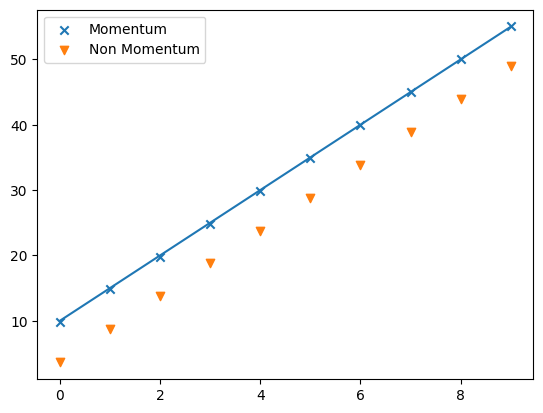

In [74]:
import matplotlib.pyplot as plt
plt.scatter(x.numpy(),l1(x).detach().numpy(),marker = "x")
plt.scatter(x.numpy(),l2(x).detach().numpy(),marker = "v")
plt.plot(x.numpy(),y.numpy())
plt.legend(["Momentum", "Non Momentum"])
plt.show()

### Appendix2
Pytorchを普通の最適化に使えないか?
例えば$y = \dfrac{1}{x+10} + 5$という関数を<br>
学習可能なパラメーターa, bをもちいて$y = \dfrac{1}{x+a} + b$を用いてaとbを求めるように計算を行う。

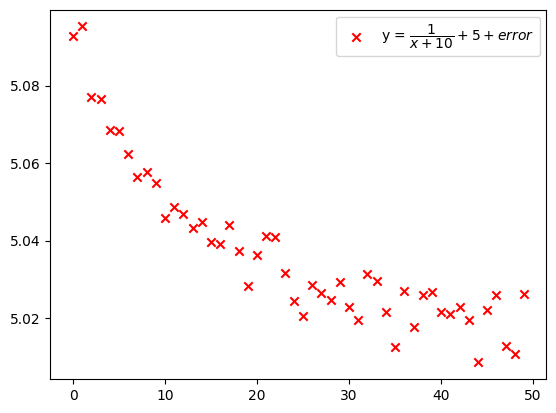

In [75]:
import numpy as np
import torch
import matplotlib.pyplot as plt
x = np.arange(50, dtype = "float32")
y = 1/(x + 10) + 5. + np.random.uniform(size = 50, low = -0.01, high = 0.01)
y = y.astype("float32")
plt.scatter(x,y,color = "red", marker = "x")
plt.legend(["y = $\dfrac{1}{x+10}+5+error$"])
plt.show()

In [76]:
#DataLoaderとパラメーターの定義
from torch.utils.data import TensorDataset
x_train = torch.from_numpy(x).view(-1,1)
y_train = torch.from_numpy(y).view(-1,1)
train_dl = TensorDataset(x_train, y_train)
a = torch.ones(1, requires_grad=True).to(torch.float32)
b = torch.ones(1, requires_grad=True).to(torch.float32)

In [77]:
class Model(nn.Module):
    def __init__(self, a, b):
        super().__init__()
        self.a = nn.Parameter(a)
        self.b = nn.Parameter(b)
    def forward(self,x):
        return 1/(x+self.a) + self.b
model = Model(a,b)
criterion = nn.MSELoss(reduction="sum")
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [78]:
epochs = 1000
best_score = 100
for epoch in range(epochs):
    for x_b, y_b in train_dl:
        pred = model(x_b)
        loss = criterion(pred, y_b)
        loss.backward()
        if loss.item() < best_score:
            best_params = model.parameters
        optimizer.step()
        optimizer.zero_grad()
    if (epoch+1) % 200 == 0:
        print(f"epoch: {epoch+1}, loss: {loss.item()}")

epoch: 200, loss: 0.00018702448869589716
epoch: 400, loss: 0.00014653074322268367
epoch: 600, loss: 0.00013629171007778496
epoch: 800, loss: 0.00013620265235658735
epoch: 1000, loss: 0.00013620265235658735


In [79]:
model.parameters = best_params

In [80]:
x_test = np.linspace(0,49, num = 200).astype("float32")
x_test = torch.from_numpy(x_test)
y_test = model(x_test)

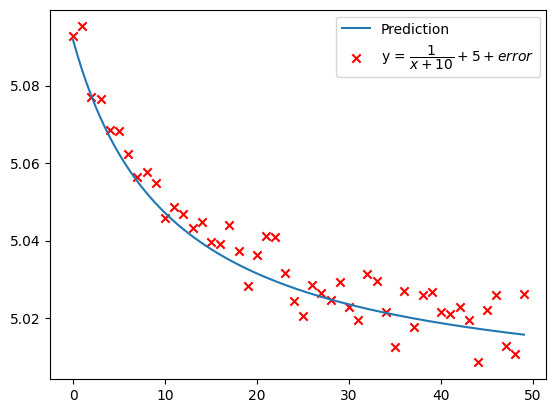

In [81]:
plt.plot(x_test.detach().numpy(), y_test.detach().numpy())
plt.scatter(x,y,color = "red", marker = "x")
plt.legend(["Prediction","y = $\dfrac{1}{x+10}+5+error$"])
plt.show()

Pytorchが最適計算に使えることもわかった。<br>
Pytorchの本質はこのようにモデルと損失関数を定義してさえしまえばあとは勝手に計算を行ってくれることであるとわかる。<br>
従って、理論式があるようなデータを扱う時は理論に沿ってモデルを立てた方が変なモデルを作るよりもいい結果を導いてくれることがわかる。<br>